## Task 0. Implement a function that convolves image with a given kernel. (20 pt)

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random 

def convolution(image, kernel):
    m, n = kernel.shape
    y, x = image[:,:,0].shape
    y = y - m + 1
    x = x - m + 1
    img = []
    for dim in range(3):
        new_image = np.zeros((y,x))
        for i in range(y):
            for j in range(x):
                new_image[i][j] = np.sum(image[i:i+m, j:j+m,dim]*kernel)
        img.append(new_image)
    newIMG = np.stack([img[0],img[1],img[2]],axis=-1)
    return newIMG

## Task 1. Detect Edges from the given image (lane.png) using the convolution function you implemented in Task 0 (20 pt)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 0, '<Output Image>')

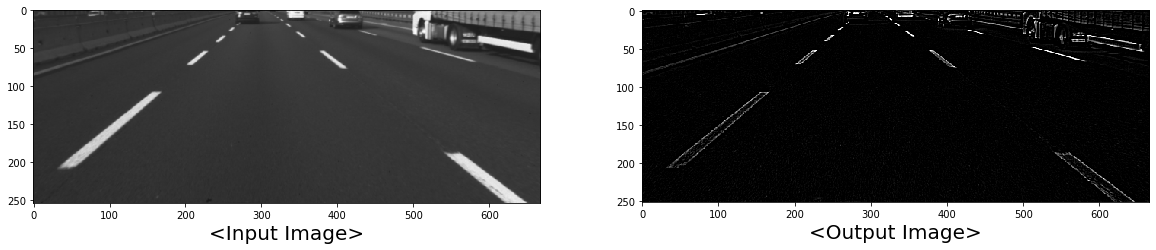

In [2]:
img = cv2.imread('lane.png')/255
#img = cv2.resize(img, dsize = (774,300))/255

kernel = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]], dtype = 'int64')
new_img = convolution(img,kernel)

plt.figure(figsize = (20,40))
plt.subplot(1,2,1)
plt.imshow(img)
plt.xlabel('<Input Image>', fontsize=20)
plt.subplot(1,2,2)
plt.imshow(new_img)
plt.xlabel('<Output Image>', fontsize=20)

## Task 2. Thresholding the edge images. (10 pt)

In [3]:
def thresholding(image):
    img = image.copy()
    h = img.shape[0]
    w = img.shape[1]
    for i in range(h):
        for j in range(w):
            if img[i,j,0] > 0.3:
                img[i,j] = 1
            else:
                img[i,j] = 0
    return img

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 0, '<Output Image>')

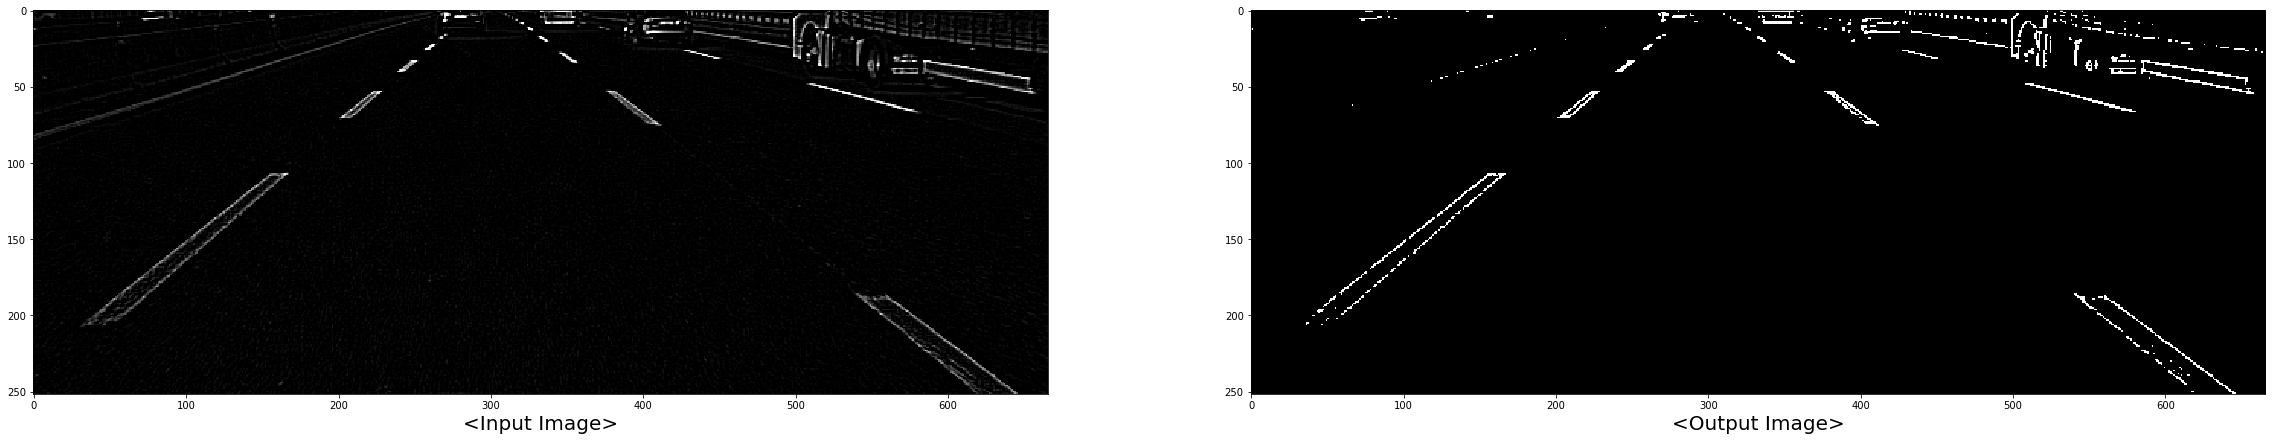

In [4]:
img_thres = thresholding(new_img)
plt.figure(figsize = (40,80))
plt.subplot(1,2,1)
plt.imshow(new_img)
plt.xlabel('<Input Image>', fontsize=20)
plt.subplot(1,2,2)
plt.imshow(img_thres)
plt.xlabel('<Output Image>', fontsize=20)

## Task 3. Perform a RANSAC algorithm to detect lines which consti- tutes the lane on the Edge Image, and Draw the lines on the image. All the examples below are good results for this task.(50 pt)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


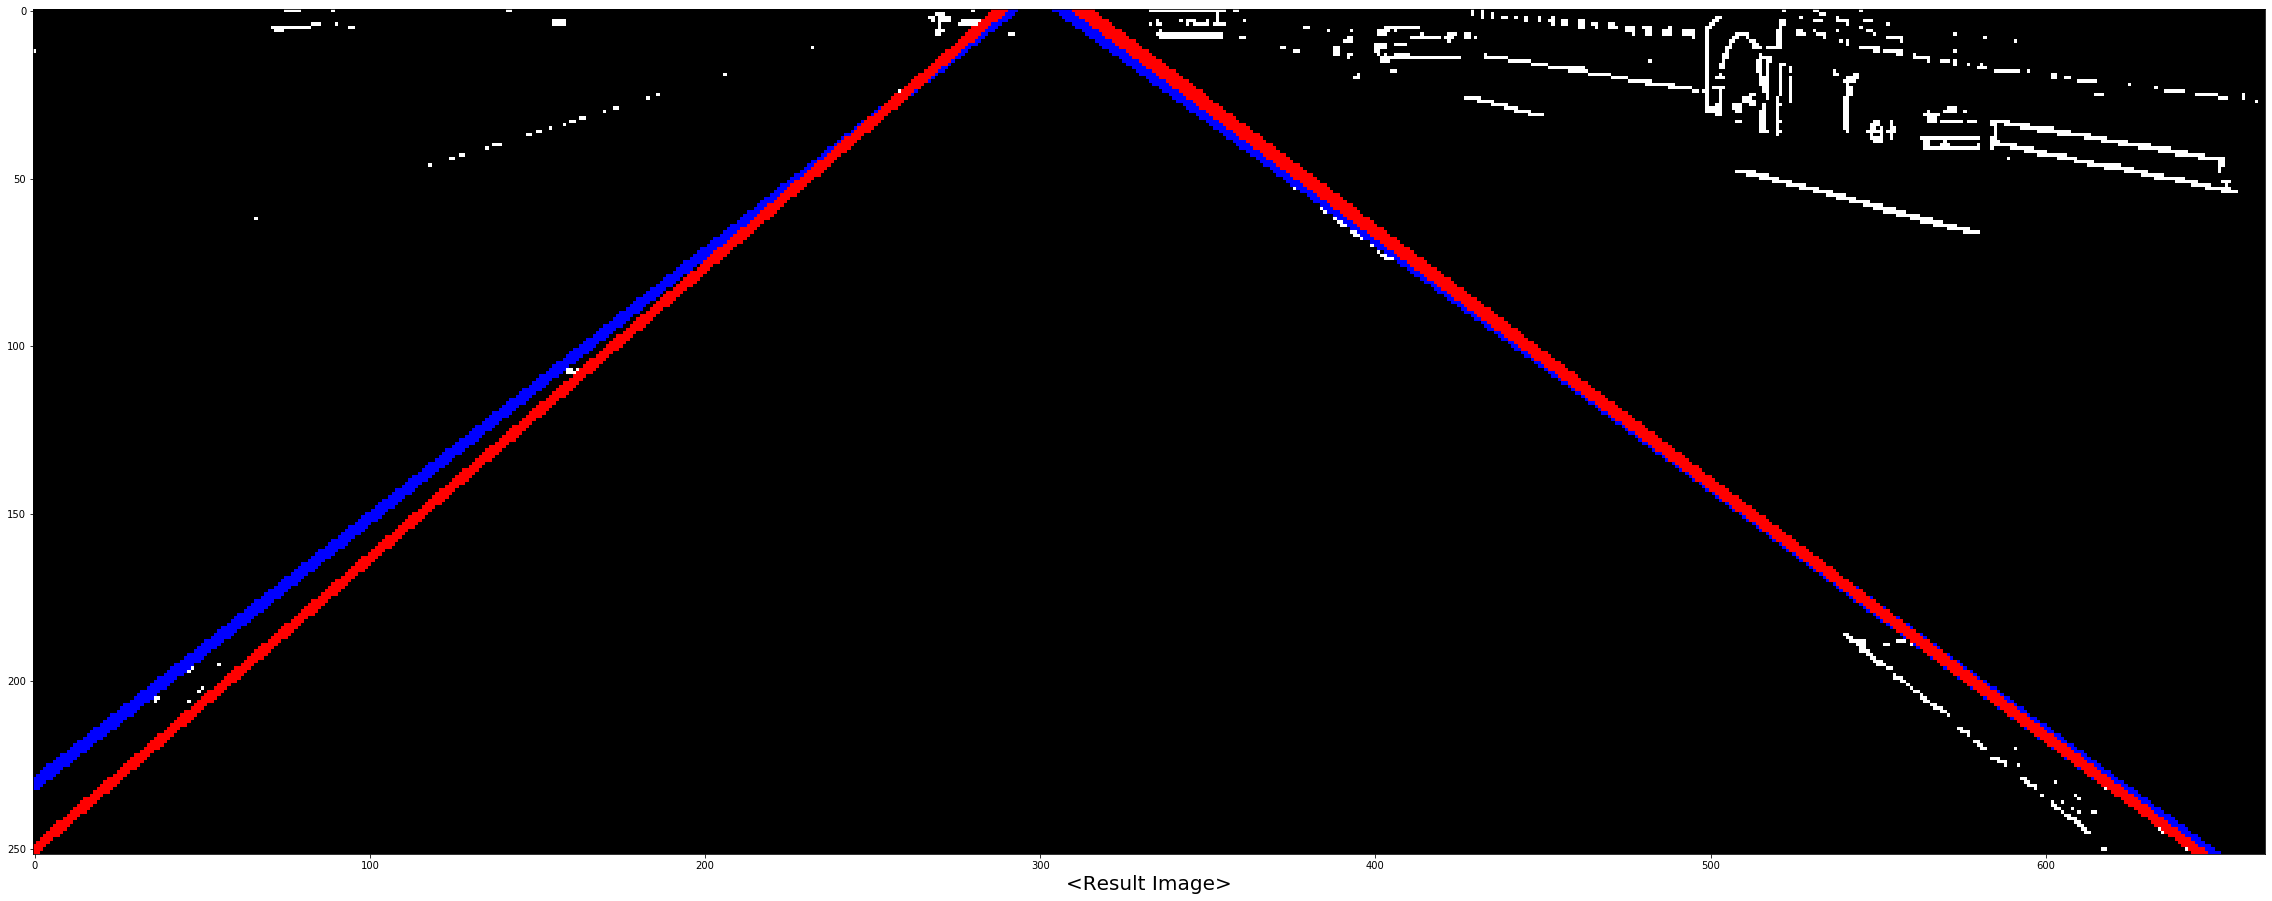

In [10]:
class Li():
    def __self__(self, img):
        self.img = img
        self.m = 0
        self.b = 0
        
    def make_linear(self, x1, y1, x2, y2):
        if x1 == x2:
            self.m = 0
        else:
            self.m = (y2-y1)/(x2-x1)
        self.b = y1 - self.m * x1
    
    def distance(self, x , y):
        return abs(self.m*x - y + self.b)/((self.m**2 + 1)**0.5)
                    
                    
    def cv2_line(self, x_max):
        x1 = 0
        y1 = self.b
        x2 = x_max
        y2 = x_max * self.m + self.b
        return (int(x1), int(y1)), (int(x2), int(y2))
    
    
def RANSAC(img, iteration, t, d):
    
    y = np.where(img>0)[0]
    x = np.where(img>0)[1]
    N = 0
    models = []
    img*=255
    while N < iteration:
        rm_idx = []
        model = Li()  # random linear function
        indices = np.random.randint(0, x.size, size=2)
        
        model.make_linear(x[indices[0]], y[indices[0]], x[indices[1]], y[indices[1]])

        cnt = 0
        for p in range(x.size):
            dist = model.distance(x[p], y[p])
            if dist < t : # threshold 보다 가까이 있으면 추가
                cnt += 1
                rm_idx.append(p)

        if cnt > d:
            models.append(model)
      
            x = np.delete(x, rm_idx)
            y = np.delete(y, rm_idx)

        N += 1
    
    
    for m in models:
        (x1, y1), (x2, y2) = m.cv2_line(img.shape[1])
        cv2.line(img,(x1, y1),(x2, y2),(255,0,0),2)
    
    cv2.imwrite('Result_Image.png', img)
    plt.figure(figsize = (40,80))
    plt.imshow(img)
    plt.xlabel('<Result Image>', fontsize=80)


RANSAC(img_thres, 500, 0.9, 670)